In [222]:
import pandas as pd
import quandl
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import requests
import datetime
import cryptocompare
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings("ignore")

## 2. Time Series and GD in Python and NumPy

In [176]:
# Getting quandl API
key_1 = quandl.ApiConfig.api_key = "JepaoR-rKUDTh3xZw2Xr"

#Generating time series of Silver
silver = quandl.get("LBMA/SILVER", start_date="2020-06-9", end_date="2020-07-04")
xt_data = pd.DataFrame.from_dict(silver)
xt= xt_data["GBP"]
xt


# Getting cryptoCompare API
cryptocompare_API_key = "bbff4feae034140397b945771b365bcf41b3bf6f3e4e0df64bb69670b498638a"
cryptocompare.cryptocompare._set_api_key_parameter(cryptocompare_API_key)

# Generating time series of btc price and setting date time index
btc= cryptocompare.get_historical_price_day('BTC', 'GBP', limit=24, exchange='CCCAGG', toTs=datetime.datetime(2020,7,4))
btc_data = pd.DataFrame.from_dict(btc)
btc_data.set_index("time", inplace=True)
btc_data.index = pd.to_datetime(btc_data.index, unit='s')
btc_data['datetimes'] = btc_data.index
btc_data['datetimes'] = btc_data['datetimes'].dt.strftime(
    '%Y-%m-%d')
yt= btc_data["close"]

In [177]:
# Ensuring that both Btc and Silver are the same length
df ={}
df['Silver'] = xt_data["GBP"]
df["Btc"] = btc_data["close"]
df = pd.DataFrame(df).fillna(method ="ffill")

# Creating a one dimensional array of both Btc and Silver 
x= np.array(df["Silver"])
y= np.array(df["Btc"])

#### Finding OLS estimates from standard OLS formulae

In [178]:
# Use numpy to estimate parameters α and β
beta = ((np.multiply(y, x)).mean()-np.mean(x)*np.mean(y))/((np.multiply(x, x)).mean()-np.mean(x)*np.mean(x))
alpha =np.mean(y)-beta*np.mean(x)

print("Estimated alpha (intercept):", alpha)
print("Estimated beta (slope):", beta)

Estimated alpha (intercept): 10302.207519569227
Estimated beta (slope): -197.7874883298927


In [179]:
y_hat0 = alpha + np.multiply(beta,x)
L = np.sum(np.multiply(y - y_hat0,y - y_hat0))
L

332852.46148844133

#### Finding OLS estimates from Machine Learning with a Gradient Descent

In [180]:
alpha = 10310

y_hat = alpha + np.multiply(beta,x)
y_hat

array([7550.8645378 , 7566.68753686, 7523.17428943, 7546.90878803,
       7546.90878803, 7546.90878803, 7608.22290941, 7588.44416058,
       7560.75391221, 7525.15216432, 7511.30704013, 7511.30704013,
       7511.30704013, 7457.90441828, 7481.63891688, 7489.55041642,
       7523.17428943, 7469.77166758, 7469.77166758, 7469.77166758,
       7436.14779457, 7432.1920448 , 7404.50179643, 7475.70529223,
       7448.01504387])

In [181]:
iterations = 500
learningrate = 0.01
def  cal_cost(alpha,beta,x,y):
        n = len(y)
        predictions = alpha + np.multiply(beta,x)
        cost = (1/2*n) * np.sum(np.square(predictions-y))
        return cost

In [182]:
cal_cost(alpha,beta,x,y)

4179631.6283755107

In [183]:
cal_cost(10310,beta,x,y)

4179631.6283755107

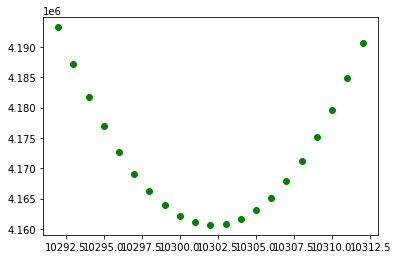

In [184]:
iterations = 21
alpha = 10291

loss_history = np.zeros((iterations,1))
alpha_history = np.zeros((iterations,1))

for i in range(iterations):
    alpha = alpha +1
    
    loss_history[i] = cal_cost(alpha,beta,x,y)
    alpha_history[i] = alpha
    
plt.plot(alpha_history,loss_history,'go')

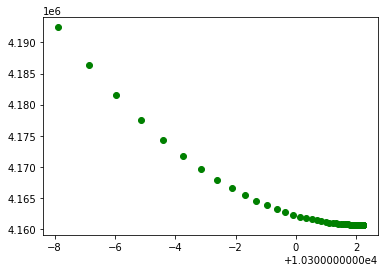

In [185]:
iterations = 1000
alpha = 10291
n = len(y)

loss_history = np.zeros((iterations,1))
alpha_history = np.zeros((iterations,1))

for i in range(iterations):
    
        
        prediction = alpha + np.multiply(beta,x)
        residuals = y-prediction
        residuals_sum = sum(residuals)
        gradient = -(1/n)*0.1*residuals_sum
 
        alpha = alpha - gradient
    
        loss_history[i] = cal_cost(alpha,beta,x,y)
        alpha_history[i] = alpha
    
plt.plot(alpha_history,loss_history,'go')

    A popular variation of gradient descent is called Stochastic Gradient Descent (SGD). SGD modifies the model parameters using the gradient of the loss function after processing each training example as opposed to the traditional gradient descent, which waits until the end of an epoch or batch. This is more efficient for larger data sets and may result in quicker convergence because the model is updated more frequently. SGD also includes some noise during the training process, which can help the model escape local minima and explore the solution space extensively, resulting in better generalisation and increased accuracy

    Convergence to a loss function minimum can be complex due to a couple of challenges.
    1. Local minima happen when the optimisation algorithm gets stuck in a local minimum, preventing it from finding the global minimum. 
    2. Plateaus: The optimisation process can slow down or stop when the loss function has a plateau.
    3. Ill-conditioned: The optimisation process can be difficult when the loss function is ill-conditioned.
    
    To combat these challenges, techniques such as 
    1. Careful initialisation: Choosing the initial parameters of the model carefully 
    2. Regularisation: Techniques such as L1 or L2 regularisation can help eliminate overfitting
    3. Learning rate scheduling: This can optimise convergence to the minimum. 
    4. Advanced optimisation algorithms can optimise the process to overcome local minima and plateaus more efficiently. E.g.: Adam and RMSprop

## 3. AI and the Blockchain

 ### Discuss whether Bitcoin is Turing Complete. Include reference to Ian Grigg’s paper cited on the course and contrast this view to mainstream views. 

    Bitcoin is not Turing complete. Ian Grigg contends that Bitcoin is not Turing complete in his work "Financial Cryptography in 7 Layers." According to Grigg, the scripting language employed by Bitcoin is intentionally limited to prevent arbitrary computations from being used to attack the network or create other problems. Consequently, Satoshi Nakamoto, the person who invented Bitcoin, set this restriction as part of the design process because he intended to develop a user-friendly and safe cryptocurrency system.
      
    The majority of opinions agree with Grigg's conclusion that Bitcoin is not Turing complete. The functions that the Bitcoin scripting language may perform are intended to be kept to a minimum. These include performing conditional statements, executing transfers of money between addresses, and validating signatures. The majority of transactions on the Bitcoin network can be completed with just these operations, but more is required to support general-purpose computation.
      
     In my opinion, Bitcoin is not Turing complete, which is in line with the general consensus. Although the majority of the functions required for financial transactions can be supported by Bitcoin's scripting language, it is not intended to handle arbitrary computations. This restriction is set on purpose to preserve the stability and security of the network. Although some alternative cryptocurrencies have Turing-complete scripting languages implemented, they have also had some problems, such as scalability and security flaws. I believe that Bitcoin's limited scripting language is a benefit, not a drawback, and contributes to the long-term sustainability of the network.

 ### ChatGPT: Discussion Question: How does ChatGPT differ from traditional chatbots, and what are the potential benefits and drawbacks of using a large language model like ChatGPT for conversational AI? Do you think this is a good question?

    This is a good question because it explores the advantages and disadvantages of using a large language model like ChatGPT for conversational AI, which is rapidly evolving with considerable implications for various industries. The question spurs an investigation into the abilities and limitations of ChatGPT in comparison to traditional chatbots. Understanding the benefits and drawbacks of ChatGPT can help users make informed decisions about whether and how to use this technology in their conversational AI applications. Traditional chatbots use rule-based techniques to generate responses, restricting their ability to create creative responses. In contrast, ChatGPT develops more human-like responses by drawing on extensive natural language data.
    
    The likely benefits of using ChatGPT for conversational AI includes:
	ChatGPT can comprehend and generate replies in natural language because it can understand the intricacies of human conversation.
	Compared to conventional chatbots, ChatGPT can produce cleverer, varied, and contextually suitable responses. 
	ChatGPT is more flexible than traditional chatbots since it can adapt to various conversational scenarios and circumstances.
    
    The likely drawbacks include:
	ChatGPT may produce inappropriate or offensive responses because it bases its response generation on training data.
	Smaller organisations may find it difficult to employ ChatGPT because they require an extensive computational capacity to train and use.
	ChatGPT requires a lot of data to train, which might raise questions about how personal data is collected and used.

    Ultimately, the quality of everyday interactions can be enhanced using ChatGPT for conversational AI. Nevertheless, potential downsides like privacy issues and inappropriate responses must also be considered.




###     Finally, in another 250 words to what extent do you think Blockchain technology could provide a solution to any systemic problems coming from AI? (again refer to the Ian Grigg paper, amongst other sources).

      Some of the systemic issues that may result from the use of AI may be addressed by blockchain technology. It is often challenging to pinpoint the origin of algorithmic decisions, which is one of the fundamental issues with AI. In light of this, it may be difficult to spot and eliminate biases or errors in the decision-making process. Blockchain technology, which is decentralised and transparent, can assist in resolving this problem by providing an immutable record of the data used to train AI models and the decisions made by these models
      
    According to Ian Grigg's paper, blockchain technology can be used to give AI systems an audit trail, allowing businesses to confirm the data's origin and the judgements made by algorithms. This promotes the fairness, accountability, and transparency of AI systems. Furthermore, blockchain technology can build decentralised marketplaces for data, giving people the ability to manage and monetize their data independently from major corporations.
    
    The use of blockchain technology to address systemic issues in AI is not without its limitations. The ability of blockchain systems to handle the massive amounts of data needed for AI applications can be one of the key challenges. Additionally, because blockchain systems use a lot of energy to run, there are concerns about the environment impact.
    
    In conclusion, while blockchain technology may be able to address some of the systemic issues related to AI, it is not a magic fix. It should be viewed as one instrument among many in the on-going effort to ensure that AI systems are fair, transparent, and accountable.


## 4. Time Series Forecasting

I decided to forecast the price of Bitcoin (BTC) for this analysis. Since Bitcoin is one of the most well-known and widely accepted cryptocurrencies in the world. Addtionally, the price of Bitcoin is unpredictable and volatile, which makes it an interesting series to study.

Factors that Affect Bitcoin's Price
    Supply and Demand: Similar to any other asset, supply and demand have an impact on the price of bitcoin. Price increases are likely to occur in situations when there is a great demand for Bitcoin but a small supply.
	Government Policies: Government policies and laws can have a big impact on the price of bitcoin. Any limitations or bans on Bitcoin may result in less demand and a decline in price.
    Market Attitude: The attitude of the market and investors can have an effect on the price of bitcoin. Positive news or events may boost prices, but negative news may result in a decrease in prices.
    Competition: The emergence of other cryptocurrencies and alternative investments may also have an impact on the price of bitcoin since they may divert investors' attention from it.

Making predictions about the price of Bitcoin using machine learning methods can give investors useful information about the variables that influence its value and aid in strategic decision-making. However, it is crucial to remember that the cryptocurrency market is extremely unpredictable and volatile, so past results may not necessarily be indicative of future results.

In [378]:
btc_coins = pd.DataFrame()
my_crypo_key = " "

In [403]:
URL_A = "https://min-api.cryptocompare.com/data/v2/histoday?fsym=BTC&tsym=USD&limit=10 &api_key= JepaoR-rKUDTh3xZw2Xr"
URL = URL_A + my_crypo_key
data = requests.get(URL)
json_data = data.json()
table = pandas.json_normalize(datah,'Data').set_index('time')
table.index = pandas.to_datetime(table.index, unit='s')
btc_coins = pd.concat ([btc_coins, table.high], axis=1)

    

In [380]:
btc_coins

,high
2023-04-20 00:00:00,29094.52
2023-04-21 00:00:00,28360.43
2023-04-22 00:00:00,27882.99
2023-04-23 00:00:00,27822.64
2023-04-24 00:00:00,27989.50
2023-04-25 00:00:00,28396.41
2023-04-26 00:00:00,30017.37
2023-04-27 00:00:00,29891.79
2023-04-28 00:00:00,29604.84
2023-04-29 00:00:00,29463.49


In [381]:
coins_lagged = coins.copy ()
trailing_window_size = 1
for window in range(1, trailing_window_size +1):
    shifted = coins.shift(window)
    shifted.columns = [x + " lag" + str(window) for x in coins. columns]
    coins_lagged = pd. concat((coins_lagged, shifted), axis=1)
coins_lagged = coins_lagged.dropna()
coins_lagged

,high,high lag1
2023-04-21 00:00:00,28360.43,29094.52
2023-04-22 00:00:00,27882.99,28360.43
2023-04-23 00:00:00,27822.64,27882.99
2023-04-24 00:00:00,27989.50,27822.64
2023-04-25 00:00:00,28396.41,27989.50
2023-04-26 00:00:00,30017.37,28396.41
2023-04-27 00:00:00,29891.79,30017.37
2023-04-28 00:00:00,29604.84,29891.79
2023-04-29 00:00:00,29463.49,29604.84
2023-04-30 00:00:00,29963.23,29463.49


In [382]:
coins_lagged.to_csv('crypto_prices_data.csv', index_label='time')

In [383]:

df = pd.read_csv('crypto_prices_data.csv', index_col='time')

In [384]:
#Making sure the index is Pandas datetime 
#Using normalize to mke it daily analysis
df.index = pd.to_datetime(df.index)
df.index = df.index.normalize ()

In [385]:
#Importing the sklearn standard scalar Library 
from sklearn.preprocessing import StandardScaler 


In [386]:
#Scaling data
sc_x = StandardScaler ()
df_scaled = pd.DataFrame (sc_x.fit_transform(df), index=df.index, columns=df.columns)

In [387]:
split = int(int(lim)/2)
Ytrain = pd.DataFrame(data_scaled[:split]["BTC"])
Ytest = pd.DataFrame(data_scaled[split:]["BTC"])

In [388]:
x = data_scaled[["BTC_lag_1", "BTC_lag_2", "Trans_Vol", "Difficulty", "Hash_Rate", 
                 "BTC/USD", "CPI", "No_Trans", "Cost/Trans", "ETH/BTC", "ETH/USD"]]

In [389]:
#Applying regularisation with elasticnet
from sklearn.linear_model import ElasticNet

en = ElasticNet(alpha=0.1, l1_ratio=0.5)
en.fit(x[:split], Ytrain)

ElasticNet(alpha=0.1)

In [390]:
coef = list(en.coef_)
count = 0
for i in X.columns:
    print(i, ':' , coef [count]) 
    count = count + 1

BTC_lag_1 : 0.0
BTC_lag_2 : 0.0
Trans_Vol : 0.004276875802850161
Difficulty : -0.0
Hash_Rate : -0.0
BTC/USD : 0.0
CPI : 0.0
No_Trans : 0.0
Cost/Trans : 0.0
ETH/BTC : -0.0
ETH/USD : 0.0


In [391]:
sample_size = len(df_scaled)

# Splitting data in two parts. 
split = int(int(sample_size)/2)

In [392]:
# Setting the y variable of interest to forecast BTC and splitting it into training and test sets
Ytrain = pd.DataFrame(data_scaled[:split]["BTC"])
Ytest = pd.DataFrame(data_scaled[split:]["BTC"])

In [393]:
x=data_scaled[["BTC_lag_1", "BTC_lag_2", "Trans_Vol", "Difficulty", "Hash_Rate", 
                 "BTC/USD", "CPI", "No_Trans", "Cost/Trans", "ETH/BTC", "ETH/USD"]]


en = ElasticNet(alpha=0.1, l1_ratio=0.5)
en.fit(x[:split], Ytrain)

ElasticNet(alpha=0.1)

In [394]:
# Converting the en.coef to a list 
coef = list(en.coef_)
count = 0
for i in X.columns:
    print(i, ":", coef[count])
    count = count + 1

BTC_lag_1 : 0.0
BTC_lag_2 : 0.0
Trans_Vol : 0.0
Difficulty : 0.0
Hash_Rate : 0.0
BTC/USD : 0.0
CPI : 0.0
No_Trans : 0.028783204918196262
Cost/Trans : 0.0
ETH/BTC : -0.0
ETH/USD : 0.0


In [395]:
#Applying regularisation with elasticnet
from sklearn.linear_model import ElasticNet

en = ElasticNet(alpha=0.1, l1_ratio=0.5)
en.fit(Xtrain, Ytrain)

ElasticNet(alpha=0.1)

In [396]:
coef = list(en.coef_)

count = 0
for i in X.columns:
    print(i, ":", coef[count])
    count = count + 1

BTC_lag_1 : 0.0
BTC_lag_2 : 0.0
Trans_Vol : 0.0
Difficulty : 0.0
Hash_Rate : 0.0
BTC/USD : 0.0
CPI : 0.0
No_Trans : 0.028783204918196262
Cost/Trans : 0.0
ETH/BTC : -0.0
ETH/USD : 0.0


In [397]:
#Testing prediction
ypred = en.predict(Xtest)
print("Predicted y values:", ypred)
Ytest

Predicted y values: [-0.31811861 -0.34687958 -0.33876638 -0.33714544 -0.33507842 -0.34860043
 -0.33338856 -0.32936681 -0.35689175 -0.38522678 -0.35274454 -0.34401874
 -0.35197551 -0.37060505 -0.34258445 -0.35941028 -0.39909187 -0.35639533
 -0.33483989 -0.34520366 -0.34396995 -0.33166384 -0.35390855 -0.37060582
 -0.37826519 -0.31345251 -0.32903921 -0.31094559 -0.31655808 -0.33720121
 -0.37400491 -0.33616576 -0.31687096 -0.33187914 -0.35977428 -0.32990583
 -0.33508074 -0.36479663 -0.35686465 -0.36624176 -0.34976288 -0.35031585
 -0.33123789 -0.34758744 -0.38540413 -0.37476465 -0.37282774 -0.31845472
 -0.34321873 -0.35847552 -0.34734813 -0.39882468 -0.37855794 -0.33389892
 -0.33757604 -0.37147476 -0.3496746  -0.37276656 -0.36967493 -0.3636907
 -0.32883553 -0.37022479 -0.34737911 -0.38120116 -0.35721005 -0.36946118
 -0.34834795 -0.36645009 -0.33888023 -0.35091373 -0.37355263 -0.41383364
 -0.36545027 -0.35242082 -0.35950012 -0.34906897 -0.3683932  -0.37253732
 -0.4032476  -0.36088485 -0.3471

,BTC
Date,
2021-01-08,0.119085
2021-01-09,0.204536
2021-01-10,0.173542
2021-01-11,0.029180
2021-01-12,-0.165298
...,...
2022-12-27,-1.509556
2022-12-28,-1.525193
2022-12-29,-1.536718


The Mean Absolute Error (MSE) and Rsquared (R^2) metrics is used to measure the performance 

In [402]:
import numpy as np
from sklearn.metrics import confusion_matrix

y_true= np.array(Ytest["BTC"])
y_predict = np.array(Ytrain["BTC"])
